### Importing Imoprtant Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
# Importing Data Set
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

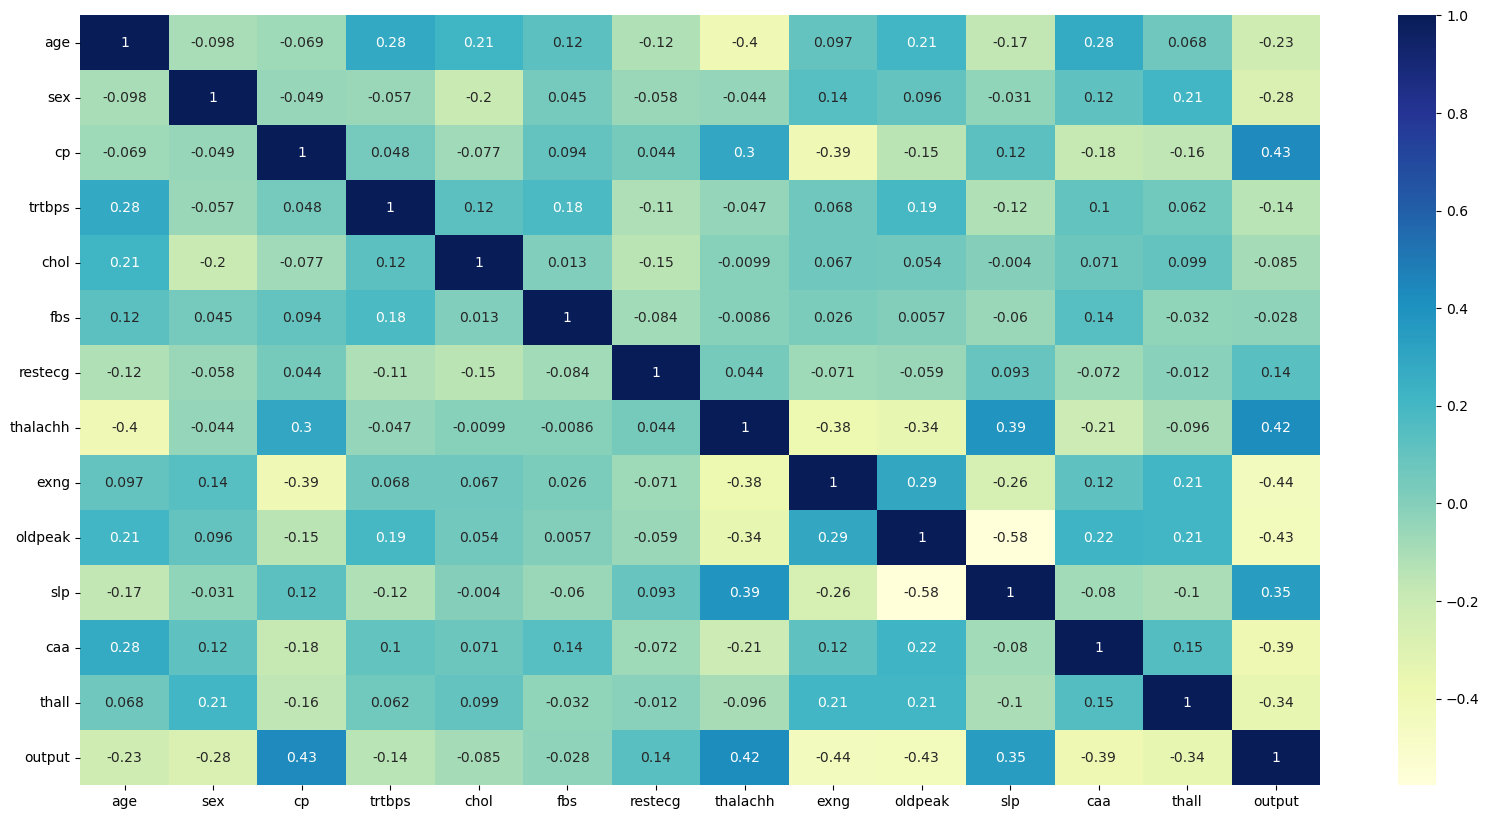

In [10]:
plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")

In [11]:
#Checking for imbalance in the output class
df.output.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: output, dtype: float64

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


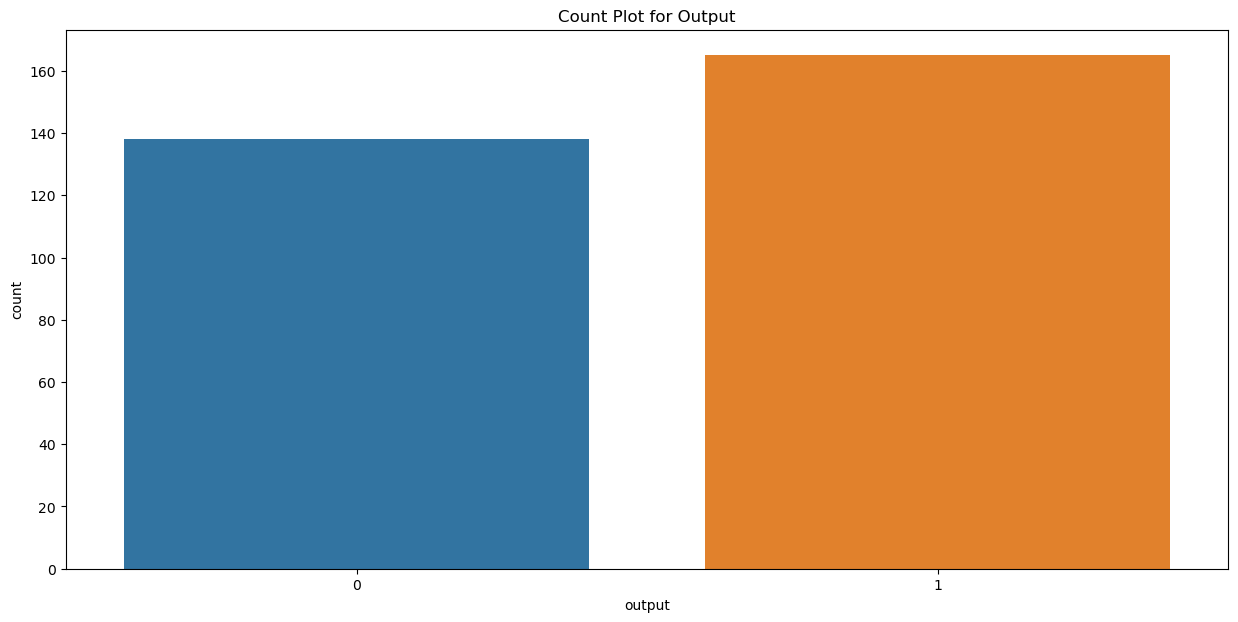

In [12]:
plt.figure(figsize=[15,7])
plt.title('Count Plot for Output')
sns.countplot(df['output'])
plt.show()

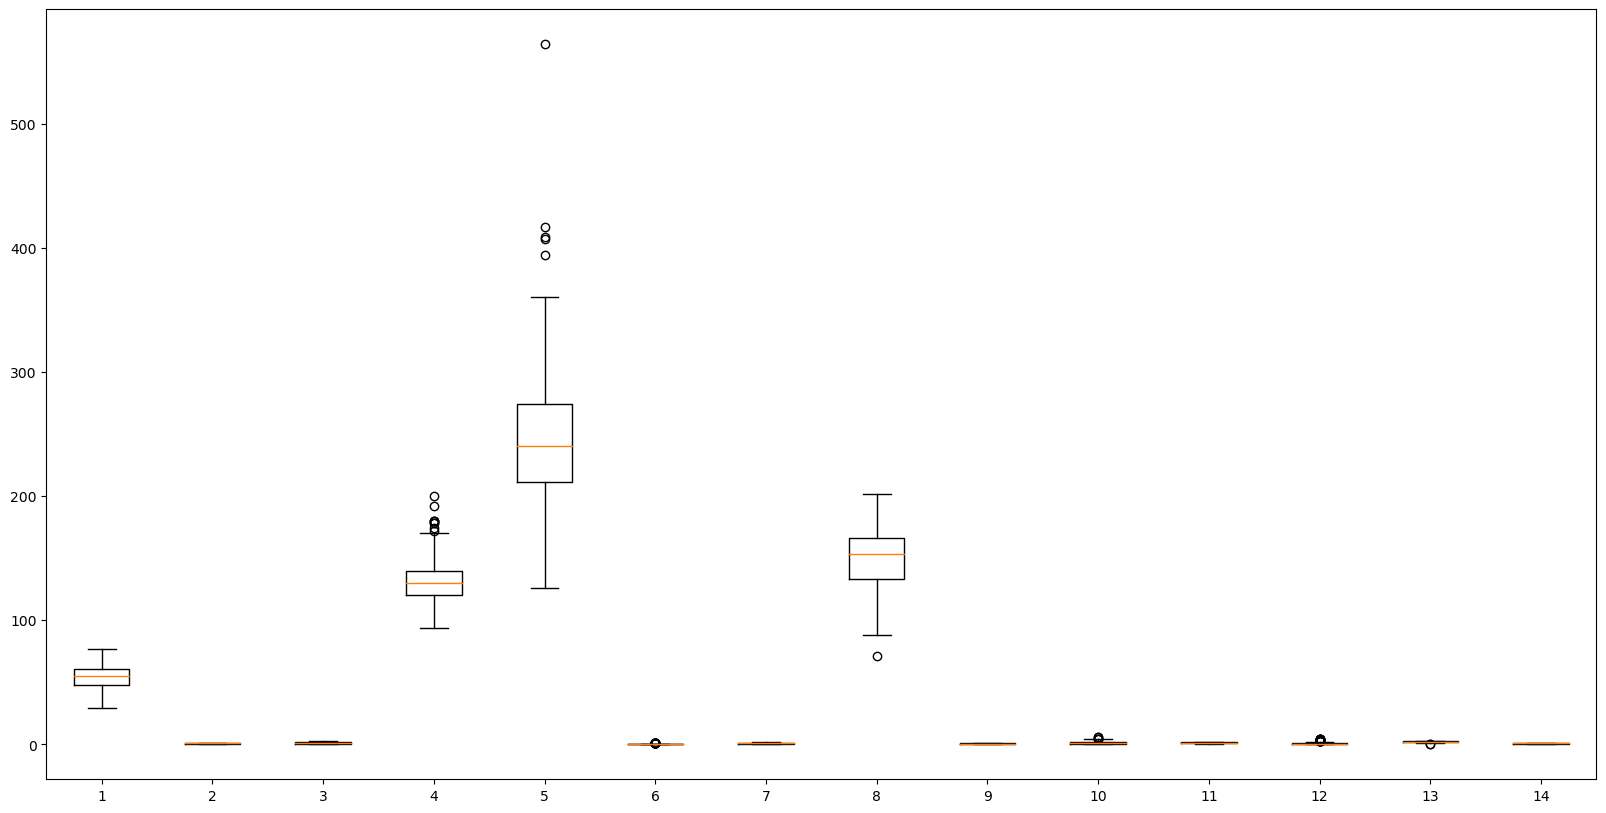

In [13]:
plt.subplots(figsize=(20,10))
plt.boxplot(df)
plt.show()

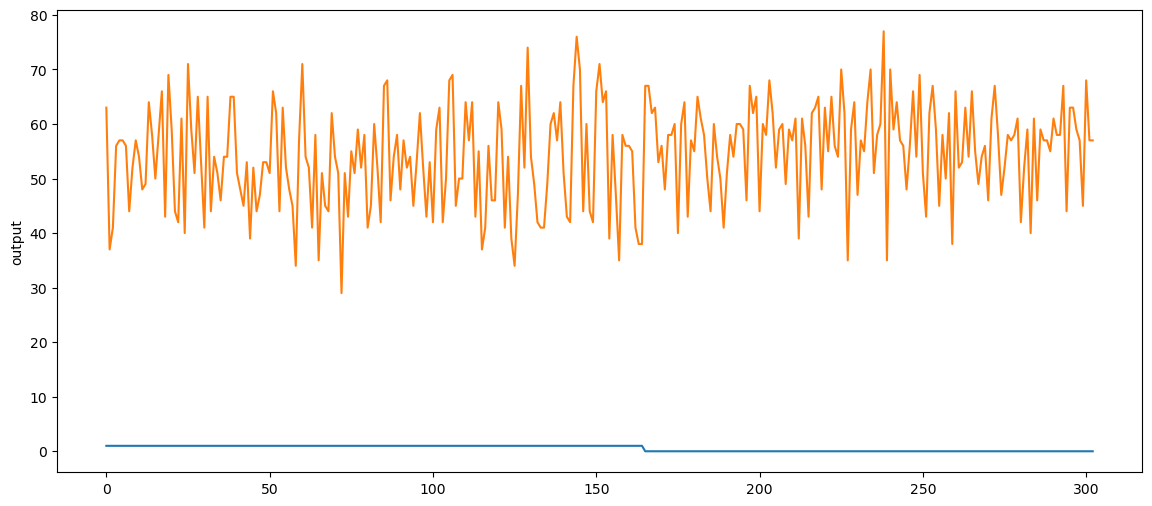

In [14]:
plt.figure(figsize = (14,6))
sns.lineplot(data=df['output'])
sns.lineplot(data=df['age'])
plt.show()

# Machine Learning Algorithm

In [15]:
x=df.drop('output', axis=1)
x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [16]:
y=df['output']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

# Logistic Regression

In [18]:
lg = LogisticRegression()

In [19]:
lg.fit(x_train, y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
# Traning Accuracy
lg.score(x_train, y_train)

0.8553719008264463

In [21]:
# Traning Accuracy
lg.score(x_train, y_train)

0.8553719008264463

In [22]:
pred_lg = lg.predict(x_test)
pred_lg

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [23]:
cm_lg = metrics.confusion_matrix(y_test, pred_lg)
print(cm_lg)

[[25  4]
 [ 3 29]]


<AxesSubplot:>

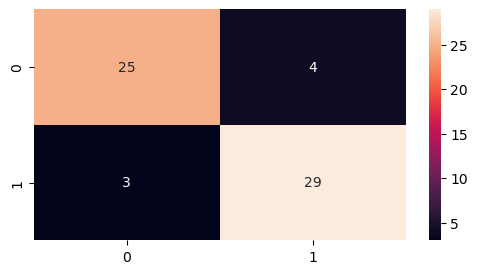

In [24]:
plt.subplots(figsize=(6,3))
sns.heatmap(cm_lg,annot=True)

In [26]:
tp,fn,fp,tn=cm_lg.reshape(-1)

In [27]:
tp

25

In [28]:
fn

4

In [29]:
fp

3

In [30]:
tn

29

In [31]:
accuracy=(tp+tn)/(tp+tn+fp+fn)
accuracy

0.8852459016393442

In [32]:
precision=tp/(tp+fp)
precision

0.8928571428571429

In [33]:
sensitivity=tp/(tp+fn)
sensitivity

0.8620689655172413

In [34]:
Specificity=tn/(tn+fp)
Specificity

0.90625

In [35]:
F1_Score=(precision+sensitivity)/2
F1_Score

0.8774630541871922

In [36]:

print(classification_report(y_test,pred_lg))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [37]:
Logistic_Regression_Accuracy = accuracy_score(y_test, pred_lg)
Logistic_Regression_Accuracy

0.8852459016393442

# KNeighbors Classifier

In [38]:
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
knn.fit(x_train, y_train) 

KNeighborsClassifier()

In [39]:
pred_knn= knn.predict(x_test)


C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [40]:
cm_knn = confusion_matrix(y_test, pred_knn)
cm_knn


array([[18, 11],
       [ 8, 24]], dtype=int64)

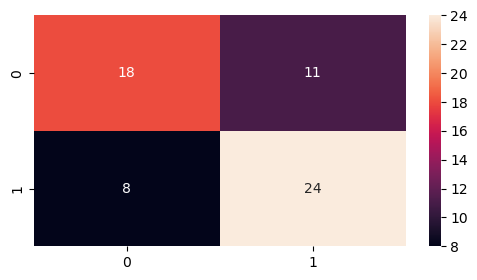

In [41]:
plt.figure(figsize = (6,3))
sns.heatmap(cm_knn, annot = True)
plt.show()

In [42]:
print(classification_report(y_test, pred_knn))


              precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



In [43]:
KNN_Accuracy = accuracy_score(y_test, pred_knn)
KNN_Accuracy

0.6885245901639344

# Random Forest Classifier

In [44]:
rf = RandomForestClassifier(n_estimators= 10, criterion="entropy")
rf.fit(x_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [45]:
pred_rf= rf.predict(x_test)


In [46]:
cm_rf = confusion_matrix(y_test, pred_rf)


In [47]:
cm_rf

array([[28,  1],
       [10, 22]], dtype=int64)

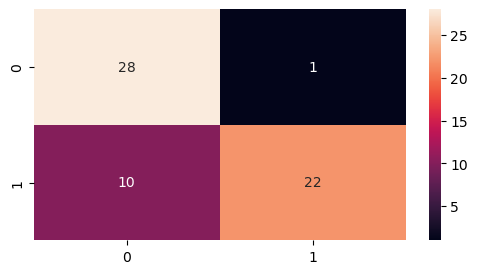

In [48]:
plt.figure(figsize = (6,3))
sns.heatmap(cm_rf, annot = True)
plt.show()


In [49]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.74      0.97      0.84        29
           1       0.96      0.69      0.80        32

    accuracy                           0.82        61
   macro avg       0.85      0.83      0.82        61
weighted avg       0.85      0.82      0.82        61



In [50]:
Random_Forest_Accuracy = accuracy_score(y_test, pred_rf)
Random_Forest_Accuracy

0.819672131147541

### Decision Tree Algorithm

In [51]:
dt = DecisionTreeClassifier()


In [52]:
dt.fit(x,y)


DecisionTreeClassifier()

[Text(0.5104166666666666, 0.9545454545454546, 'X[2] <= 0.5\ngini = 0.496\nsamples = 303\nvalue = [138, 165]'),
 Text(0.2638888888888889, 0.8636363636363636, 'X[11] <= 0.5\ngini = 0.397\nsamples = 143\nvalue = [104, 39]'),
 Text(0.16666666666666666, 0.7727272727272727, 'X[12] <= 2.5\ngini = 0.499\nsamples = 65\nvalue = [31, 34]'),
 Text(0.09259259259259259, 0.6818181818181818, 'X[8] <= 0.5\ngini = 0.361\nsamples = 38\nvalue = [9, 29]'),
 Text(0.037037037037037035, 0.5909090909090909, 'X[7] <= 96.5\ngini = 0.153\nsamples = 24\nvalue = [2, 22]'),
 Text(0.018518518518518517, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.05555555555555555, 0.5, 'X[4] <= 316.5\ngini = 0.083\nsamples = 23\nvalue = [1, 22]'),
 Text(0.037037037037037035, 0.4090909090909091, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(0.07407407407407407, 0.4090909090909091, 'X[4] <= 362.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05555555555555555, 0.3181818181818182, 'gini = 0.0\nsamples = 1\nvalue

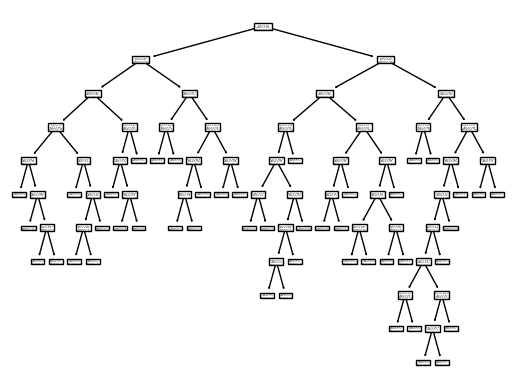

In [53]:
tree.plot_tree(dt)


[Text(0.5104166666666666, 0.9545454545454546, 'X[2] <= 0.5\ngini = 0.496\nsamples = 303\nvalue = [138, 165]'),
 Text(0.2638888888888889, 0.8636363636363636, 'X[11] <= 0.5\ngini = 0.397\nsamples = 143\nvalue = [104, 39]'),
 Text(0.16666666666666666, 0.7727272727272727, 'X[12] <= 2.5\ngini = 0.499\nsamples = 65\nvalue = [31, 34]'),
 Text(0.09259259259259259, 0.6818181818181818, 'X[8] <= 0.5\ngini = 0.361\nsamples = 38\nvalue = [9, 29]'),
 Text(0.037037037037037035, 0.5909090909090909, 'X[7] <= 96.5\ngini = 0.153\nsamples = 24\nvalue = [2, 22]'),
 Text(0.018518518518518517, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.05555555555555555, 0.5, 'X[4] <= 316.5\ngini = 0.083\nsamples = 23\nvalue = [1, 22]'),
 Text(0.037037037037037035, 0.4090909090909091, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(0.07407407407407407, 0.4090909090909091, 'X[4] <= 362.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05555555555555555, 0.3181818181818182, 'gini = 0.0\nsamples = 1\nvalue

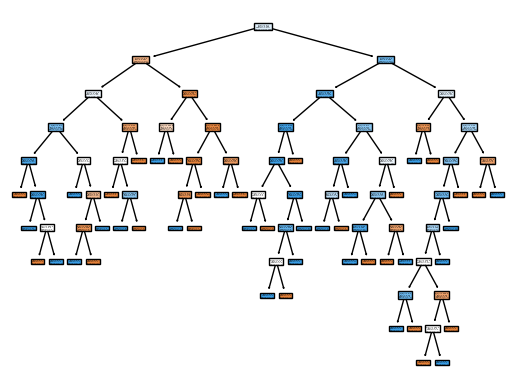

In [54]:
tree.plot_tree(dt, filled=True)


In [55]:
x.columns


Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')

[Text(0.5104166666666666, 0.9545454545454546, 'cp <= 0.5\ngini = 0.496\nsamples = 303\nvalue = [138, 165]'),
 Text(0.2638888888888889, 0.8636363636363636, 'caa <= 0.5\ngini = 0.397\nsamples = 143\nvalue = [104, 39]'),
 Text(0.16666666666666666, 0.7727272727272727, 'thall <= 2.5\ngini = 0.499\nsamples = 65\nvalue = [31, 34]'),
 Text(0.09259259259259259, 0.6818181818181818, 'exng <= 0.5\ngini = 0.361\nsamples = 38\nvalue = [9, 29]'),
 Text(0.037037037037037035, 0.5909090909090909, 'thalachh <= 96.5\ngini = 0.153\nsamples = 24\nvalue = [2, 22]'),
 Text(0.018518518518518517, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.05555555555555555, 0.5, 'chol <= 316.5\ngini = 0.083\nsamples = 23\nvalue = [1, 22]'),
 Text(0.037037037037037035, 0.4090909090909091, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(0.07407407407407407, 0.4090909090909091, 'chol <= 362.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05555555555555555, 0.3181818181818182, 'gini = 0.0\nsamples = 1\nvalue

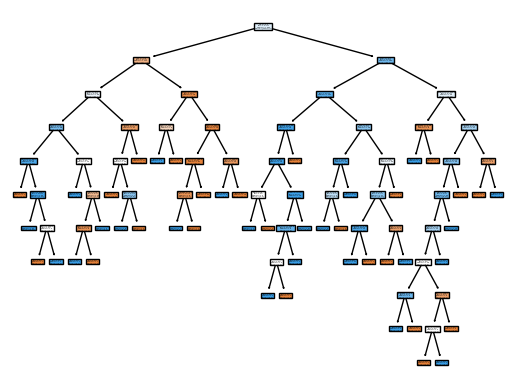

In [56]:
tree.plot_tree(dt,filled=True, feature_names=x.columns)


In [57]:
dt.fit(x_train, y_train)


DecisionTreeClassifier()

In [58]:
dt.score(x_train, y_train)


1.0

In [59]:
dt.score(x_test, y_test)


0.8360655737704918

In [60]:
pred_dt=dt.predict(x_test)
pred_dt

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [61]:
print(confusion_matrix(y_test, pred_dt))


[[26  3]
 [ 7 25]]


<AxesSubplot:>

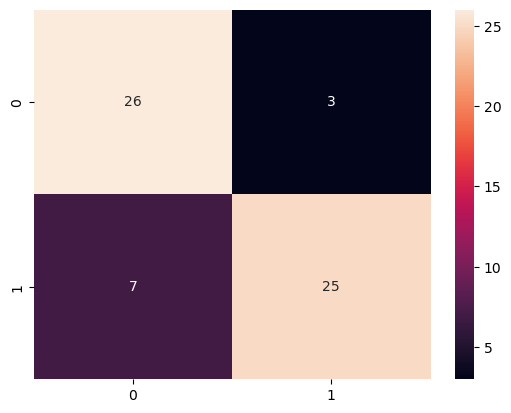

In [62]:
cm = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm,annot=True)


In [63]:
print(classification_report(y_test,pred_dt))


              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [64]:
Decision_Tree_Accuracy = accuracy_score(y_test,pred_dt)
Decision_Tree_Accuracy

0.8360655737704918

### Support Vector Machine

In [65]:
svm = SVC(kernel='linear')
# svm = SVC(kernel='rbf', gamma='auto')

In [66]:
svm.fit(x_train, y_train)


SVC(kernel='linear')

In [67]:
svm.score(x_test, y_test)


0.8688524590163934

In [68]:
pred_svm = svm.predict(x_test)  
pred_svm

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [69]:
print(confusion_matrix(y_test, pred_svm))


[[25  4]
 [ 4 28]]


<AxesSubplot:>

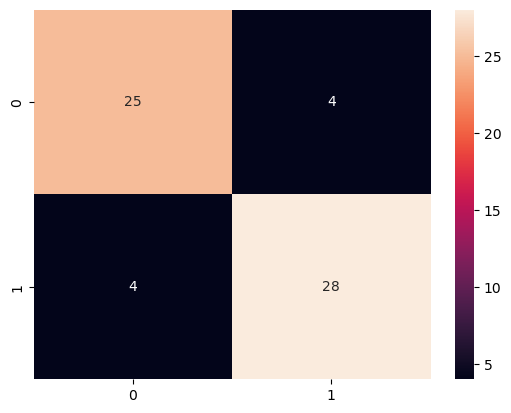

In [70]:
cm_svm = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm_svm,annot=True)

In [71]:
print(classification_report(y_test,pred_svm))


              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [72]:
SVM_Accuracy = accuracy_score(y_test,pred_svm)
SVM_Accuracy

0.8688524590163934

### Summary of Machine Learning Algorithms

In [73]:
MLA= ['SVM_Accuracy','Decision_Tree_Accuracy','Random_Forest_Accuracy','KNN_Accuracy','Logistic_Regression_Accuracy']
Accuracy_Scores = [0.8688524590163934,0.819672131147541,0.819672131147541,0.6885245901639344,0.8852459016393442]

In [74]:
data=pd.DataFrame(list(zip(MLA, Accuracy_Scores)), columns =['ML', 'Accuracy'])
data

,ML,Accuracy
0,SVM_Accuracy,0.868852
1,Decision_Tree_Accuracy,0.819672
2,Random_Forest_Accuracy,0.819672
3,KNN_Accuracy,0.688525
4,Logistic_Regression_Accuracy,0.885246


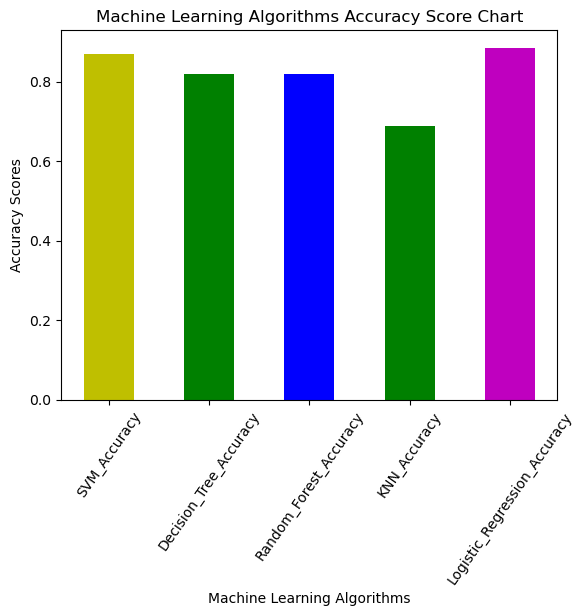

In [75]:
c = ['y','g','b','g','m']
plt.bar(MLA, Accuracy_Scores, width=0.5,color=c)
plt.xlabel('Machine Learning Algorithms')
plt.ylabel('Accuracy Scores')
plt.title('Machine Learning Algorithms Accuracy Score Chart')
plt.xticks(rotation=55)
plt.show()

Thank You